<a href="https://colab.research.google.com/github/DGuilherme/AI_Mixer/blob/main/mixer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=fdbcbc533742db5caaeafaa1166afa70dd4cbb29e8fff704513eeae1adbcfa36
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


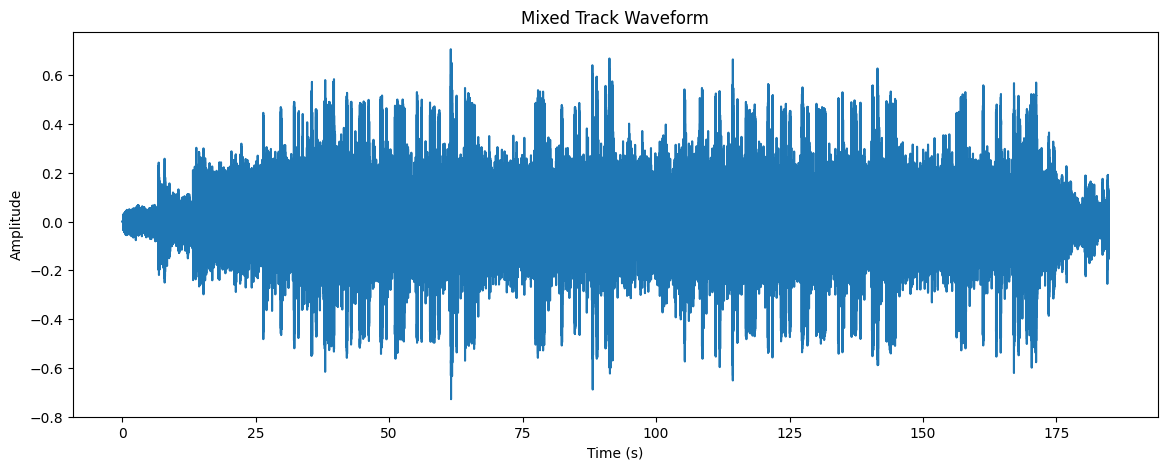

In [13]:
!pip install pydub librosa numpy soundfile
!pip install ffmpeg

from google.colab import drive
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load the audio files
audio_path1 = '/content/drive/My Drive/Musica/SasukeTheme.mp3'
audio_path2 = '/content/drive/My Drive/Musica/UKDrill.mp3'

y1, sr1 = librosa.load(audio_path1, sr=None)
y2, sr2 = librosa.load(audio_path2, sr=None)

# Ensure both tracks have the same sample rate
if sr1 != sr2:
    y2 = librosa.resample(y2, sr2, sr1)
    sr2 = sr1

# Trim or pad the shorter track to match the length of the longer track
min_length = min(len(y1), len(y2))
y1 = y1[:min_length]
y2 = y2[:min_length]

# Mix the audio tracks
mix = (y1 + y2) / 2

# Save the resulting mix
output_path = '/content/drive/My Drive/Musica/mixed_track.wav'
sf.write(output_path, mix, sr1)

# Plot the mixed waveform
def plot_waveform(y, sr, title="Waveform"):
    plt.figure(figsize=(14, 5))
    plt.plot(np.linspace(0, len(y) / sr, len(y)), y)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

plot_waveform(mix, sr1, title="Mixed Track Waveform")


In [5]:
#v2
!pip install pydub librosa numpy soundfile
!pip install ffmpeg

from google.colab import drive
import librosa
import numpy as np
import soundfile as sf



In [3]:
# Mount Google Drive
#drive.mount('/content/drive')

# Load the audio files
#audio_path1 = '/content/drive/My Drive/Musica/SasukeTheme.mp3'
#audio_path2 = '/content/drive/My Drive/Musica/UKDrill.mp3'

# Load the audio files
audio_path1 = '/content/drive/My Drive/Musica/SasukeTheme.mp3'
audio_path2 = '/content/drive/My Drive/Musica/UKDrill.mp3'

y1, sr1 = librosa.load(audio_path1, sr=None)
y2, sr2 = librosa.load(audio_path2, sr=None)

# Resample if necessary
if sr1 != sr2:
    y2 = librosa.resample(y2, sr2, sr1)
    sr2 = sr1

# Normalize volume
y1 = librosa.util.normalize(y1)
y2 = librosa.util.normalize(y2)

# Trim or pad the shorter track to match the length of the longer track
min_length = min(len(y1), len(y2))
y1 = y1[:min_length]
y2 = y2[:min_length]

# Simple crossfade mixing function
def crossfade(y1, y2, fade_duration=5):
    fade_samples = int(fade_duration * sr1)
    crossfade_curve = np.linspace(0, 1, fade_samples)

    # Apply crossfade
    y1[:fade_samples] = y1[:fade_samples] * (1 - crossfade_curve) + y2[:fade_samples] * crossfade_curve
    y1[-fade_samples:] = y1[-fade_samples:] * crossfade_curve[::-1] + y2[-fade_samples:] * (1 - crossfade_curve[::-1])

    return y1

# Mix the audio tracks using crossfade
mix = crossfade(y1, y2)

# Save the resulting mix
output_path = '/content/drive/My Drive/Musica/mixed_track_crossfade.wav'
sf.write(output_path, mix, sr1)

In [2]:
#V3
import torch
import torchaudio

In [6]:
# Load the audio files
audio_path1 = '/content/drive/My Drive/Musica/SasukeTheme.mp3'
audio_path2 = '/content/drive/My Drive/Musica/UKDrill.mp3'

y1, sr1 = librosa.load(audio_path1, sr=None)
y2, sr2 = librosa.load(audio_path2, sr=None)

# Resample if necessary
if sr1 != sr2:
    y2 = librosa.resample(y2, sr2, sr1)
    sr2 = sr1

# Normalize volume
y1 = librosa.util.normalize(y1)
y2 = librosa.util.normalize(y2)

# Trim or pad the shorter track to match the length of the longer track
min_length = min(len(y1), len(y2))
y1 = y1[:min_length]
y2 = y2[:min_length]

# Convert to PyTorch tensors
y1_tensor = torch.tensor(y1).unsqueeze(0)  # Adding batch dimension
y2_tensor = torch.tensor(y2).unsqueeze(0)  # Adding batch dimension

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network model for mixing
class AudioMixer(nn.Module):
    def __init__(self):
        super(AudioMixer, self).__init__()
        self.fc1 = nn.Linear(min_length, 512)
        self.fc2 = nn.Linear(512, min_length)
        self.relu = nn.ReLU()

    def forward(self, x1, x2):
        x1 = self.relu(self.fc1(x1))
        x2 = self.relu(self.fc1(x2))
        mixed = self.fc2(x1 + x2)
        return mixed

# Instantiate the model
model = AudioMixer()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (adjust batch size and number of epochs as needed)
batch_size = 1
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    mixed_output = model(y1_tensor, y2_tensor)
    loss = criterion(mixed_output, y1_tensor + y2_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item()}")

# Evaluate the model (optional)
model.eval()
with torch.no_grad():
    mixed_output = model(y1_tensor, y2_tensor).numpy()[0]

# Save the resulting mix
output_path = '/content/drive/My Drive/Musica/mixed_track_neural_network.wav'
sf.write(output_path, mixed_output, sr1)